In [77]:
import pandas as pd
import datetime
from scipy import stats
import seaborn as sns


In [2]:
df=pd.read_csv("2018-06-04-2021-06-11-Eastern_Africa.csv")

In [3]:
df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [6]:
# Basic filter to get violence against civilians data
filter_vac=(df["event_type"]=="Violence against civilians")
filter_remote_direct=(df["actor2"].str.contains("Civilians",na=False,case=False)&(df["event_type"]=="Explosions/Remote violence"))
df_direct=df[filter_vac|filter_remote_direct]
df_direct.reset_index(inplace=True,drop=True)

In [9]:
filter_remote_indirect=(df["event_type"]=="Explosions/Remote violence")&(df["assoc_actor_2"].str.contains("Civilians",na=False,case=False))
filter_battle=((df["event_type"]=="Battles")&(df["notes"].str.contains("civilian",na=False,case=False)))
df_indirect=df[filter_remote_indirect|filter_battle]
df_indirect.reset_index(inplace=True,drop=True)

In [60]:
df_direct.head(10)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,event_month
0,8059462,728,SSD7672,7672,2021-06-04,2021,2,Violence against civilians,Abduction/forced disappearance,Unidentified Armed Group (South Sudan),...,4.5272,31.3196,2,Anadolu Agency,International,"Around 4 June 2021 (as reported), a senior arm...",0,1623100969,SSD,04/21
1,8059698,706,SOM33985,33985,2021-06-03,2021,1,Explosions/Remote violence,Air/drone strike,Military Forces of Kenya (2013-),...,2.7352,41.0177,2,Radio Kulmiye,National,"On 3 June 2021, suspected Kenya air forces car...",0,1623100970,SOM,03/21
2,8059700,706,SOM33984,33984,2021-06-03,2021,1,Explosions/Remote violence,Air/drone strike,Military Forces of Kenya (2013-),...,3.0359,41.8674,1,Radio Kulmiye,National,"On 3 June 2021, suspected Kenya air forces car...",1,1623100970,SOM,03/21
3,8059702,108,BUR10286,10286,2021-06-03,2021,2,Violence against civilians,Attack,Unidentified Armed Group (Burundi),...,-2.9653,29.1930,2,Radio Publique Africaine,National,"Around 3 June 2021, an unidentified armed grou...",1,1623100970,BDI,03/21
4,8059748,108,BUR10287,10287,2021-06-03,2021,1,Violence against civilians,Attack,CNDD-FDD-Imbonerakure: National Council for th...,...,-2.8572,29.7353,1,SOS Medias,New media,"On 3 June 2021, Imbonerakure attacked and inju...",0,1623100970,BDI,03/21
5,8059792,706,SOM33983,33983,2021-06-03,2021,1,Violence against civilians,Attack,Gaaljecel Clan Militia (Somalia),...,4.7360,45.2043,2,Undisclosed Source,Local partner-Other,"On 3 June 2021, Gaaljecel clan militia shot an...",0,1623100970,SOM,03/21
6,8059558,231,ETH6819,6819,2021-06-03,2021,1,Violence against civilians,Attack,Tigray Peoples Revolutionary Liberation Front,...,12.6167,39.6500,2,ESAT,International,"On 3 June 2021, members of Tigrayan People's L...",1,1623100970,ETH,03/21
7,8059822,800,UGA6845,6845,2021-06-03,2021,1,Violence against civilians,Attack,Unidentified Armed Group (Uganda),...,-1.2483,29.9897,1,URN (Uganda),National,"On 3 June 2021, an unidentified group assaulte...",0,1623100970,UGA,03/21
8,8059695,706,SOM33981,33981,2021-06-02,2021,1,Violence against civilians,Attack,Military Forces of Somalia (2017-),...,2.0337,45.3400,1,Radio Dalsan,National,"On 2 June 2021, government security forces (Cu...",0,1623100970,SOM,02/21
9,8059703,108,BUR10285,10285,2021-06-02,2021,1,Violence against civilians,Attack,Police Forces of Burundi (2005-),...,-2.9718,29.2060,2,Radio Publique Africaine,National,"On 2 June 2021, police and Imbonerakure attack...",0,1623100970,BDI,02/21


In [10]:
df_indirect.to_csv("collateral_damage.csv")
df_direct.to_csv("violence_targeting_civilians.csv")

In [105]:
# Insight 1: Militray/Police Actors in Violence against civilians
gov_direct=df_direct.loc[df_direct["actor1"].str.contains("Police|Military",na=False,case=False)]
gov_indirect=df_indirect.loc[df_indirect["actor1"].str.contains("Police|Military",na=False,case=False)|df_indirect["actor2"].str.contains("Police|Military",na=False,case=False)]
gov_direct.reset_index(inplace=True,drop=True)
gov_indirect.reset_index(inplace=True,drop=True)

In [107]:
gov_actors_indirect=gov_indirect.groupby(by=["actor1","actor2"]).event_id_cnty.count().to_frame()
gov_actors_indirect.reset_index(inplace=True)
gov_actors_indirect=gov_actors_indirect.sort_values(by="event_id_cnty",ascending=False)
gov_actors_indirect.reset_index(inplace=True,drop=True)

gov_actors_direct=gov_direct.groupby(by=["actor1"]).event_id_cnty.count().to_frame()
gov_actors_direct.reset_index(inplace=True)
gov_actors_direct=gov_actors_direct.sort_values(by="event_id_cnty",ascending=False)
gov_actors_direct.reset_index(inplace=True,drop=True)


In [89]:
gov_actors_direct.head(10)

,actor1,event_id_cnty
0,Military Forces of Somalia (2017-),178
1,Military Forces of South Sudan (2011-),174
2,Police Forces of Uganda (1986-),167
3,Police Forces of Burundi (2005-),135
4,Police Forces of Kenya (2013-),106
5,Police Forces of Somalia (2017-),83
6,Police Forces of Burundi (2005-) National Inte...,77
7,Police Forces of Ethiopia (2018-) Liyu Police,73
8,Military Forces of Ethiopia (2018-),65
9,Military Forces of Uganda (1986-),42


In [90]:
gov_actors_indirect.head(10)

,actor1,actor2,event_id_cnty
0,Al Shabaab,Military Forces of Somalia (2017-),53
1,Al Shabaab,Police Forces of Somalia (2017-),21
2,Islamist Militia (Mozambique),Military Forces of Mozambique (1990-),20
3,Military Forces of Somalia (2017-),Military Forces of Somalia (2017-),18
4,Unidentified Armed Group (Somalia),Police Forces of Somalia (2017-),17
5,Unidentified Armed Group (Somalia),Military Forces of Somalia (2017-),16
6,Unidentified Armed Group (Burundi),Military Forces of Burundi (2005-),10
7,Afar Ethnic Militia (Ethiopia),Somali Ethnic Militia (Ethiopia),10
8,Dahalo Militia,Military Forces of Madagascar (2019-) Gendarmerie,9
9,NAS: National Salvation Front,Military Forces of South Sudan (2011-),6


In [108]:
gov_actors_direct.to_csv("gov_actors_direct.csv")
gov_actors_indirect.to_csv("gov_actors_indirect.csv")

In [12]:
# Insight 3 disaggregate by subtypes and countries, compare trends
df_total=pd.concat([df_indirect,df_direct])
df_total.reset_index(inplace=True,drop=True)
df_total['event_date'] = pd.to_datetime(df_total['event_date'])

In [31]:
def format(df_filter):
    df_all_sub=df_filter.groupby(by=["country","year"]).event_id_cnty.count().to_frame()
    df_all_sub.reset_index(inplace=True)
    df_all_sub["sub_event_type"]="all"
    df_subtype=df_filter.groupby(by=["country","year","sub_event_type"]).event_id_cnty.count().to_frame()
    df_subtype.reset_index(inplace=True)

    df_total_sub=pd.concat([df_subtype,df_all_sub])
    df_total_sub.reset_index(inplace=True)
    df_total_sub_pivot=pd.pivot_table(df_total_sub, values="event_id_cnty", index=['country',"sub_event_type"],columns=['year'],aggfunc="first")
    df_total_sub_pivot.reset_index(inplace=True)
    return df_total_sub_pivot

In [32]:
df_20vs21= df_total[df_total['event_date']>datetime.datetime(2020, 7, 20)]
df_20vs21.reset_index(inplace=True,drop=True)

df_20vs21_pivot=format(df_20vs21)
df_20vs21_pivot[[2020,2021]] = df_20vs21_pivot[[2020,2021]].fillna(value=0)
df_20vs21_pivot["rate"]=df_20vs21_pivot[2021]/df_total_20vs21_pivot[2020]

# Placeholder for invalid or negligible values
df_20vs21_pivot.loc[(df_20vs21_pivot[2020]==0),"rate"]=500
df_20vs21_pivot.loc[(df_20vs21_pivot[2021]<5),"rate"]=300

In [35]:
df_18_21_pivot=format(df_total)
df_18_21_pivot[[2018,2019,2020,2021]] = df_18_21_pivot[[2018,2019,2020,2021]].fillna(value=0)
df_18_21_pivot["rate"]=(df_18_21_pivot[2020]+df_18_21_pivot[2021])/(df_18_21_pivot[2018]+df_18_21_pivot[2019])

df_18_21_pivot.loc[(df_18_21_pivot[2018]+df_18_21_pivot[2019])==0,"rate"]=500
df_18_21_pivot.loc[(df_18_21_pivot[2021]+df_18_21_pivot[2020])<5,"rate"]=300

In [69]:
df_20vs21_pivot.head(10)

year,country,sub_event_type,2020,2021,rate
0,Burundi,Abduction/forced disappearance,33.0,26.0,0.787879
1,Burundi,Armed clash,19.0,2.0,300.000000
2,Burundi,Attack,117.0,124.0,1.059829
3,Burundi,Grenade,8.0,8.0,1.000000
4,Burundi,Sexual violence,1.0,5.0,5.000000
5,Burundi,all,178.0,165.0,0.926966
6,Djibouti,Attack,0.0,1.0,300.000000
7,Djibouti,all,0.0,1.0,300.000000
8,Ethiopia,Abduction/forced disappearance,2.0,2.0,300.000000
9,Ethiopia,Air/drone strike,1.0,0.0,300.000000


In [70]:
df_18_21_pivot.head(10)

year,country,sub_event_type,2018,2019,2020,2021,rate
0,Burundi,Abduction/forced disappearance,29.0,44.0,66.0,26.0,1.260274
1,Burundi,Armed clash,0.0,5.0,19.0,2.0,4.200000
2,Burundi,Attack,312.0,439.0,336.0,124.0,0.612517
3,Burundi,Grenade,22.0,25.0,16.0,8.0,0.510638
4,Burundi,Remote explosive/landmine/IED,3.0,1.0,0.0,0.0,300.000000
5,Burundi,Sexual violence,25.0,20.0,6.0,5.0,0.244444
6,Burundi,all,391.0,534.0,443.0,165.0,0.657297
7,Djibouti,Attack,0.0,6.0,1.0,1.0,300.000000
8,Djibouti,all,0.0,6.0,1.0,1.0,300.000000
9,Eritrea,Attack,1.0,0.0,1.0,0.0,300.000000


In [37]:
df_20vs21_pivot.to_csv("2020vs2021.csv")
df_18_21_pivot.to_csv("2018_2021.csv")

In [57]:
# Insight 4 Correlation of different subtypes
df_direct['event_date'] = pd.to_datetime(df_direct['event_date'])
df_direct['event_month'] = df_direct['event_date'].dt.strftime('%d/%y')
df_relation=df_direct.groupby(["event_month","sub_event_type"]).event_id_cnty.count().to_frame()
df_relation.reset_index(inplace=True)
df_relation=df_relation.pivot(index="event_month", columns="sub_event_type",values="event_id_cnty")
df_relation=df_relation.fillna(0)
stats.pearsonr(df_relation['Attack'], df_relation['Sexual violence'])
stats.pearsonr(df_relation['Attack'], df_relation['Abduction/forced disappearance'])
stats.pearsonr(df_relation['Sexual violence'], df_relation['Abduction/forced disappearance'])

<ipython-input-57-966ff0832c58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direct['event_date'] = pd.to_datetime(df_direct['event_date'])
<ipython-input-57-966ff0832c58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direct['event_month'] = df_direct['event_date'].dt.strftime('%d/%y')


(0.25206171633378954, 0.004740414061051514)

In [71]:
df_relation.head(10)

sub_event_type,Abduction/forced disappearance,Air/drone strike,Attack,Grenade,Remote explosive/landmine/IED,Sexual violence,Shelling/artillery/missile attack,Suicide bomb
event_month,,,,,,,,
01/18,6.0,0.0,21.0,0.0,4.0,1.0,1.0,1.0
01/19,8.0,0.0,70.0,2.0,2.0,10.0,1.0,0.0
01/20,8.0,4.0,86.0,1.0,1.0,0.0,2.0,0.0
01/21,1.0,0.0,33.0,0.0,2.0,0.0,0.0,0.0
02/18,3.0,0.0,33.0,0.0,5.0,1.0,1.0,0.0
02/19,5.0,1.0,59.0,2.0,2.0,4.0,2.0,0.0
02/20,9.0,1.0,63.0,2.0,3.0,2.0,1.0,0.0
02/21,5.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
03/18,1.0,1.0,35.0,2.0,5.0,2.0,0.0,0.0


In [73]:
# Questions Sexual violence

df_sexual=df_direct.loc[df_direct["sub_event_type"].str.contains("sexual",na=False,case=False)]
# 188 of 251 total cases are rape 
df_sexual[df_sexual["notes"].str.contains("rape",na=False,case=False)]

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,event_month
32,8059832,728,SSD7658,7658,2021-05-30,2021,1,Violence against civilians,Sexual violence,Bor Clan Militia (South Sudan),...,3.9227,31.5896,2,VOA,International,"On 30 May 2021, three armed men (two of whom a...",0,1623100970,SSD,30/21
125,7993371,706,SOM33847,33847,2021-05-14,2021,1,Violence against civilians,Sexual violence,Military Forces of Somalia (2017-),...,2.0581,45.3003,1,Shabelle Media Network,National,"On 14 May 2021, government soldiers (SNA) gang...",0,1621889045,SOM,14/21
226,7927493,728,SSD7561,7561,2021-04-27,2021,1,Violence against civilians,Sexual violence,Atuot Ethnic Militia (South Sudan),...,6.5495,30.0277,2,VOA; Eye Radio (South Sudan); Radio Tamazuj,National-Regional,"On 27 April 2021, two women (presumed to be Ag...",2,1620076266,SSD,27/21
272,7992885,231,ETH6758,6758,2021-04-21,2021,2,Violence against civilians,Sexual violence,Unidentified Military Forces,...,14.1234,38.7313,2,CNN,International,"Around 21 April 2021 (week of), a young woman ...",1,1621889044,ETH,21/21
276,7918060,108,BUR10215,10215,2021-04-21,2021,1,Violence against civilians,Sexual violence,CNDD-FDD-Imbonerakure: National Council for th...,...,-3.4127,29.8499,1,Inzamba,New media,"On 21 April 2021, 6 Imbonerakure raped a woman...",0,1619476352,BDI,21/21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,6136418,108,BUR8379,8379,2018-06-19,2018,1,Violence against civilians,Sexual violence,CNDD-FDD-Imbonerakure: National Council for th...,...,-3.5764,29.4167,1,Undisclosed Source,Local partner-Other,A teenage girl of Muramvya commune and provinc...,0,1571260130,BDI,19/18
6914,6136426,108,BUR8036,8036,2018-06-17,2018,1,Violence against civilians,Sexual violence,CNDD-FDD-Imbonerakure: National Council for th...,...,-2.7301,30.0119,1,Undisclosed Source,Local partner-Other,"On 17 June, the deputy youth leader of Imboner...",0,1571260130,BDI,17/18
6920,6136434,108,BUR8376,8376,2018-06-16,2018,1,Violence against civilians,Sexual violence,CNDD-FDD-Imbonerakure: National Council for th...,...,-3.0801,29.3832,1,Undisclosed Source,Local partner-Other,A teenage girl from Gisovu sub-hill of Bubanza...,0,1571260130,BDI,16/18
6923,5762938,706,SOM27048,27048,2018-06-15,2018,3,Violence against civilians,Sexual violence,Unidentified Armed Group (Somalia),...,9.5598,44.0668,3,Goobjoob,National,04 November. 101 cases of rape were recorded i...,0,1567462150,SOM,15/18


In [74]:
# viz of top actors in each country regarding violence against civilians
def top_actor(country):
    df_country=df_direct[df_direct["country"]==country].groupby(by=["actor1","year"]).event_id_cnty.count().to_frame()
    df_country.reset_index(inplace=True)
    actor_list=df_country.sort_values(by="event_id_cnty",ascending=False).head(20).actor1.unique().tolist()
    df_country_use=df_country[df_country["actor1"].isin(actor_list)]
    df_country_use.reset_index(inplace=True,drop=True)
    return df_country_use

In [78]:
top_actor("Somalia")

,actor1,year,event_id_cnty
0,Al Shabaab,2018,144
1,Al Shabaab,2019,278
2,Al Shabaab,2020,261
3,Al Shabaab,2021,85
4,Islamic State (Somalia),2018,14
5,Islamic State (Somalia),2019,3
6,Islamic State (Somalia),2020,4
7,Islamic State (Somalia),2021,1
8,Military Forces of Kenya (2013-),2018,2
9,Military Forces of Kenya (2013-),2019,3


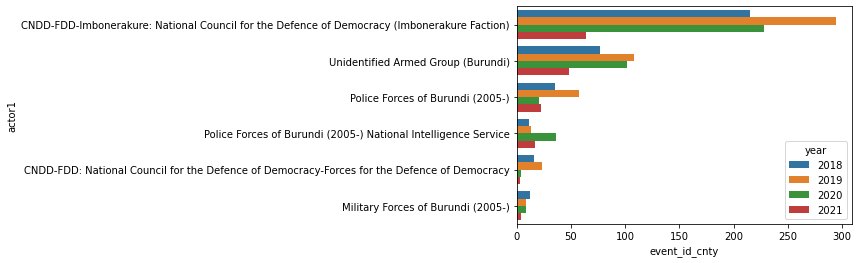

In [82]:
fig = sns.barplot(x="event_id_cnty", y="actor1", hue="year", data=top_actor("Burundi").sort_values(by="event_id_cnty",ascending=False))

In [83]:
fig.figure.savefig('Burundi.png',bbox_inches="tight")